## 导入绘图需要的模块

In [10]:
import re 
import pandas as pd # 数据框操作
import numpy as np # 矩阵运算 
import matplotlib.pyplot as plt # 绘图
import jieba # 分词
from wordcloud import WordCloud # 词云可视化
from pyecharts import Geo # 地理图

## 配置绘图格式

In [11]:
plt.rcParams["font.sans-serif"] = ["SimHei"] # 指定黑体字体
plt.rcParams["axes.labelsize"]  = 16.        # 轴的标签大小
plt.rcParams["xtick.labelsize"] = 14.        # x轴刻度大小
plt.rcParams["ytick.labelsize"] = 14.        # y轴刻度大小
plt.rcParams["legend.fontsize"] = 12.        # 图例
plt.rcParams["figure.figsize"]  = [15., 15.] # 绘图尺寸大小

## 导入数据

In [12]:
df = pd.read_csv('LaGouDataPython.csv', encoding='gbk')
# 显示前 5 行信息
df.head()

,岗位职称,工作经验,学历要求,工作类型,公司发展,工作地点,工资,工作福利,公司名称
0,高级Python研发工程师,3-5年,本科,全职,A轮,上海,15k-30k,"商业保险,年度旅游,带薪年病假,弹性工作",贝米钱包
1,PYTHON开发工程师,1-3年,本科,全职,天使轮,上海,8k-15k,五险一金,译会科技
2,Python开发工程师,3-5年,大专,全职,上市公司,深圳,18k-25k,"团队氛围,高速发展,互联网金融,五险一金",众禄金融
3,python开发工程师,1-3年,不限,全职,不需要融资,杭州,6k-10k,"双休,五险,工作8小时,法定节假日",健培
4,Python工程师,不限,本科,全职,不需要融资,广州,10k-15k,"弹性上下班,六险一金,周末双休",武汉佰钧成技术有限公司


In [13]:
# 显示后 5 行信息
df.tail()

,岗位职称,工作经验,学历要求,工作类型,公司发展,工作地点,工资,工作福利,公司名称
429,Python技术经理,5-10年,本科,全职,未融资,北京,20k-25k,职位晋升，五险一金，绩效奖金,北京八维研修学院
430,Python研发工程师,不限,本科,全职,上市公司,杭州,15k-30k,丰厚年终奖、国外旅游、弹性时间、简单平等,美登科技
431,高级Python开发工程师,3-5年,本科,全职,A轮,武汉,15k-20k,"项目有潜力,环境舒适,团队激情,待遇丰厚",猫头鹰团队
432,Python工程师,1-3年,本科,全职,A轮,北京,8k-15k,"补充医疗,出国旅游,带薪年假,绩效奖金",掌控
433,Python开发工程师,1-3年,本科,全职,B轮,北京,8k-15k,"五险一金,生日福利,交通补,饭补",店商互联


## 绘制学历要求条形图

本科    347
大专     65
不限     18
硕士      4
Name: 学历要求, dtype: int64


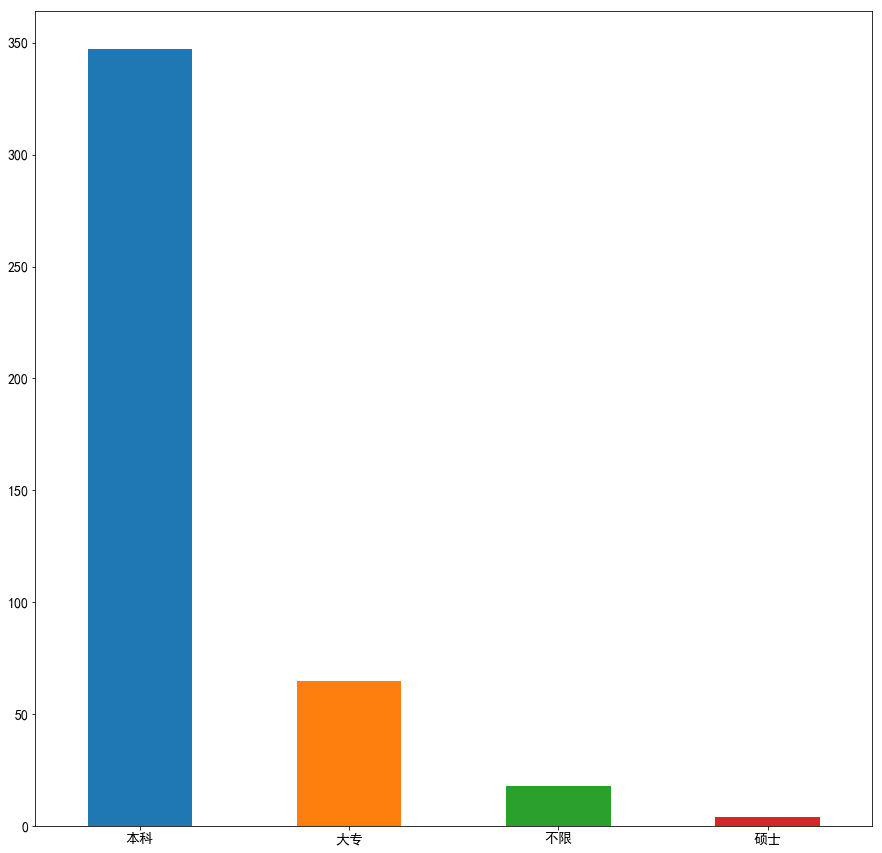

In [14]:
# 提取学历数据
education = df['学历要求']
# 统计每个学历层次的人数
data = education.value_counts()
print(data)
data.plot(kind='bar', rot=0)
plt.show()

##  绘制工作经验条形图

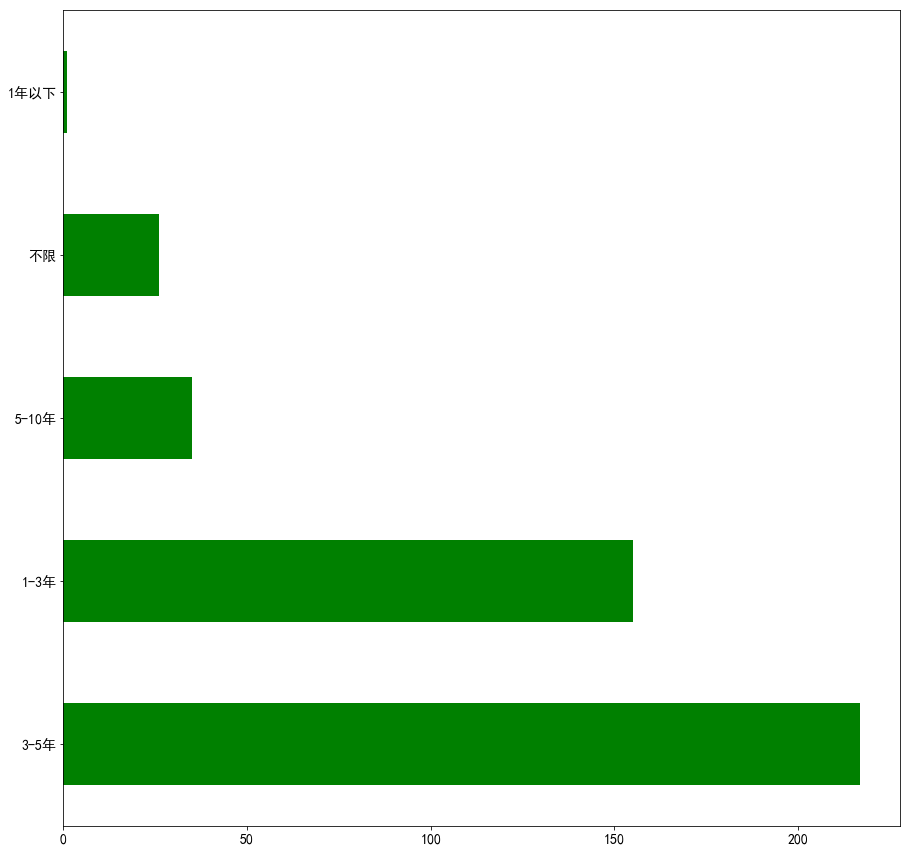

In [15]:
# 工作经验
df['工作经验'].value_counts().plot(kind='barh', rot=0, color='g')
plt.show()

## 词云显示

In [19]:
final = ''  
stopwords = ['PYTHON','python','Python','工程师','（','）','/'] # 停止词 --去掉不想显示的词汇
for n in range(df.shape[0]):
    # 切割每个岗位的名称 根据岗位名称区别岗位多少
    seg_list = list(jieba.cut(df['岗位职称'][n]))
   # 去掉不想显示的词汇
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '
# final 得到的词汇

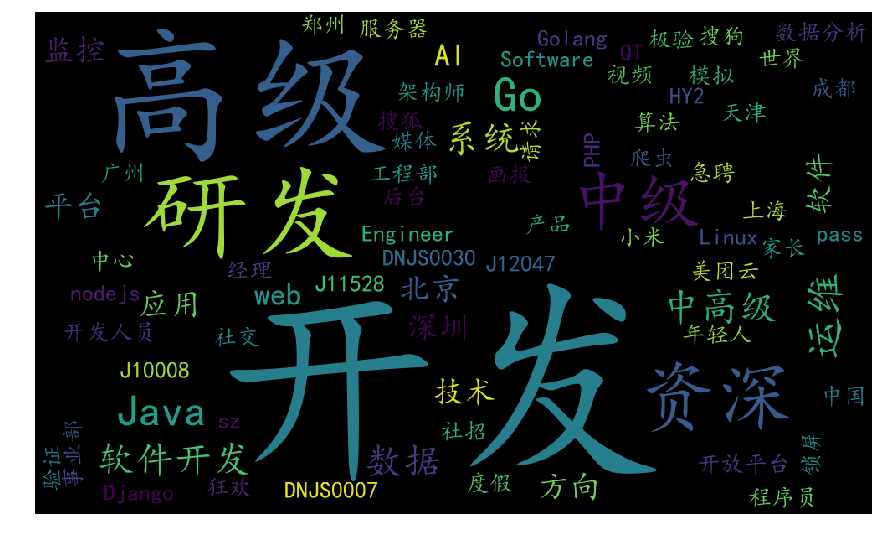

In [17]:
my_wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\simkai.ttf', width=1000,height=600)
# 产生词云图
my_wordcloud.generate(final) 
plt.imshow(my_wordcloud)
# 不显示坐标轴
plt.axis('off')
plt.show()

## 绘制工作地点分布

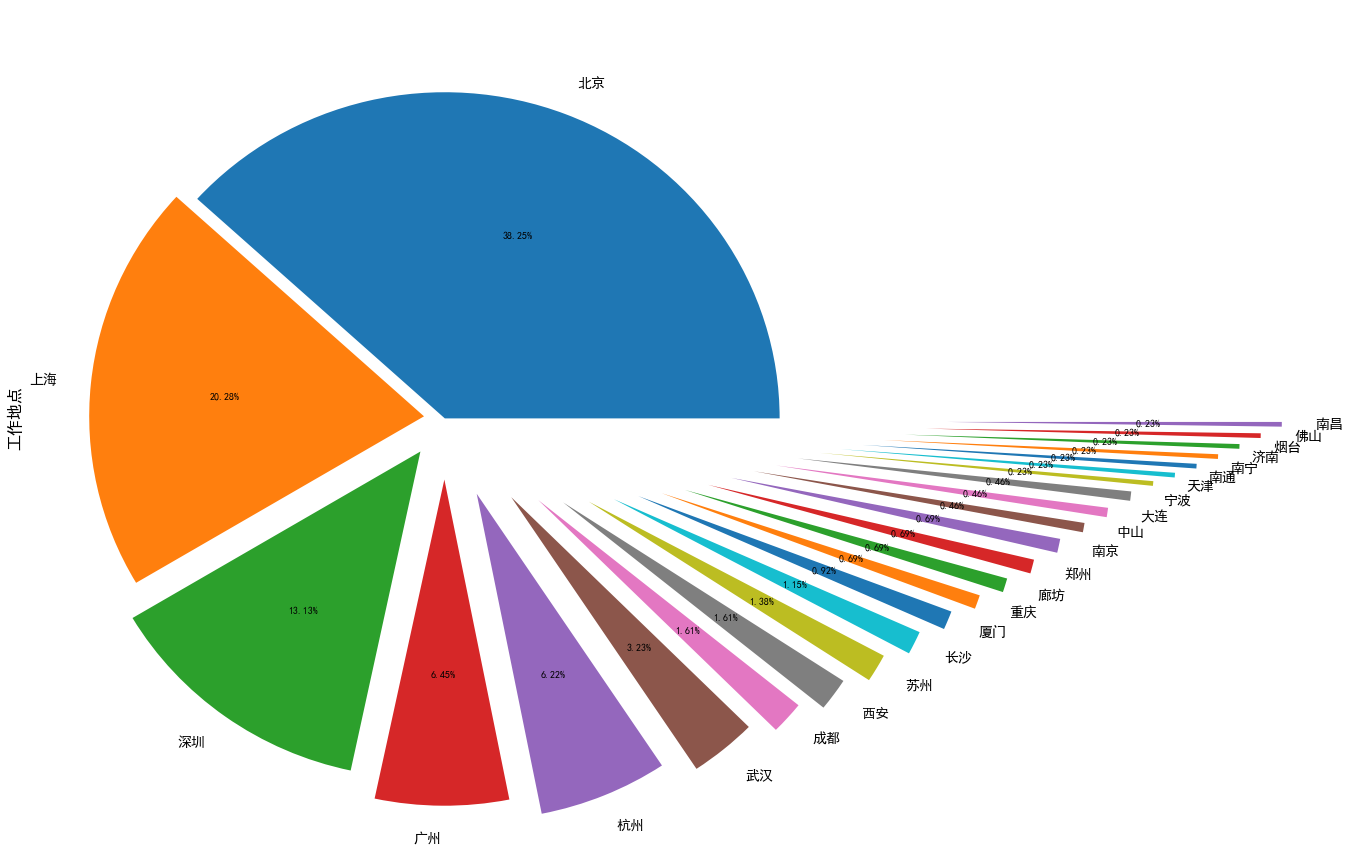

In [29]:
# 工作城市的统计饼图显示
df['工作地点'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode = np.linspace(0,1.5,25))
plt.show()